**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo:

* Gustavo Duarte Ventino

* Pedro Araujo Ribeiro

* Gabriel Crepaldi

* Arthur Faria

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

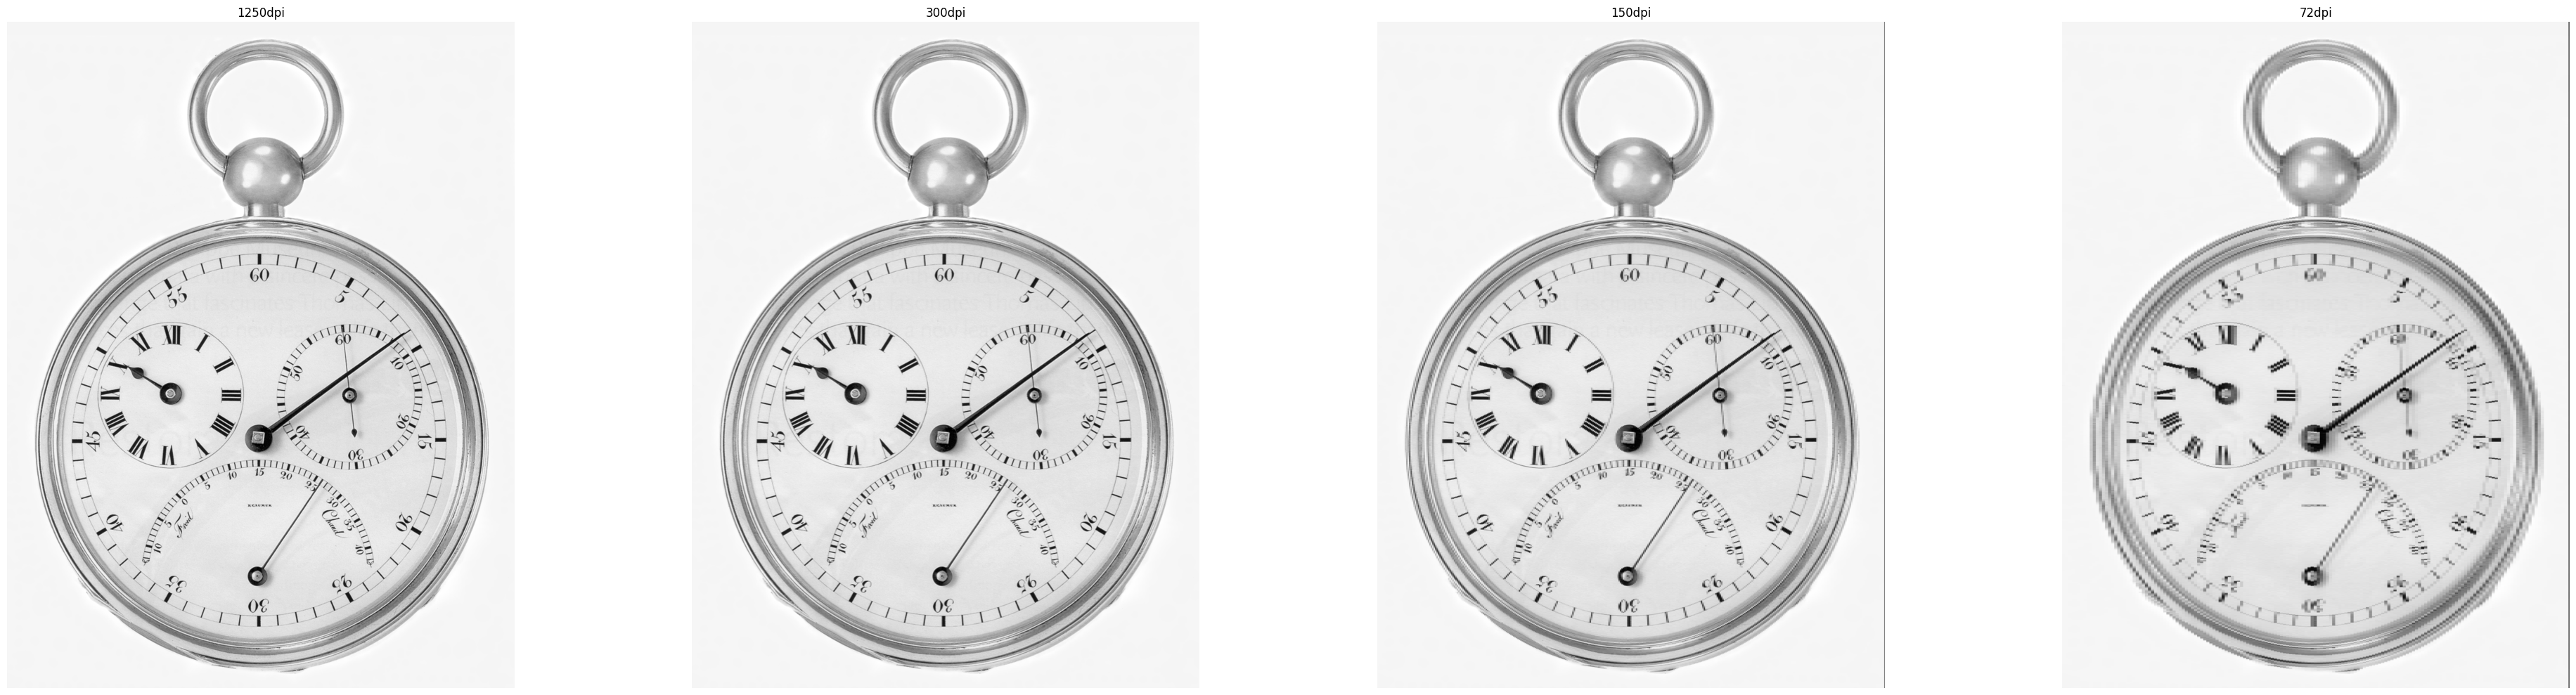

In [1]:
# type your code here
# Python code to read image
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)

# criando funcao que converte 
def converteDPI(img, og_dpi, new_dpi):    
    qtd_pixels = int(og_dpi/new_dpi)
    linhas = img.shape[0]
    colunas = img.shape[1]
   
    for i in range(0, linhas, 1):
        for j in range(0, colunas, qtd_pixels):
            media = 0

            for k in range(qtd_pixels):
                if j+k < colunas:
                    media += np.uint16(img[i][j+k])
            
            media /= qtd_pixels
            media = np.uint8(media)
            
            for k in range(qtd_pixels):
                if j+k < colunas:
                    img[i][j+k] = media
    return img

# convertendo:
new_img300 = converteDPI(img.copy(), 1250, 300)
new_img150 = converteDPI(img.copy(), 1250, 150)
new_img72 = converteDPI(img.copy(), 1250, 72)

imgs = [img, new_img300, new_img150, new_img72]
titles = ['1250dpi', '300dpi', '150dpi', '72dpi']

_, axs = plt.subplots(1, 4, figsize=(40, 10))
            
for i in range(len(imgs)):
    axs[i].imshow(imgs[i], cmap='gray', vmin=0, vmax=255);
    axs[i].set_title(titles[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()



2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

[[ 52  52  52 ...  52  50  52]
 [ 52  52  52 ...  52  50  52]
 [ 52  52  52 ...  52  50  50]
 ...
 [ 79  79  79 ...  97 112 131]
 [ 79  81  79 ... 113 122 132]
 [ 79  81  81 ... 131 129 127]]


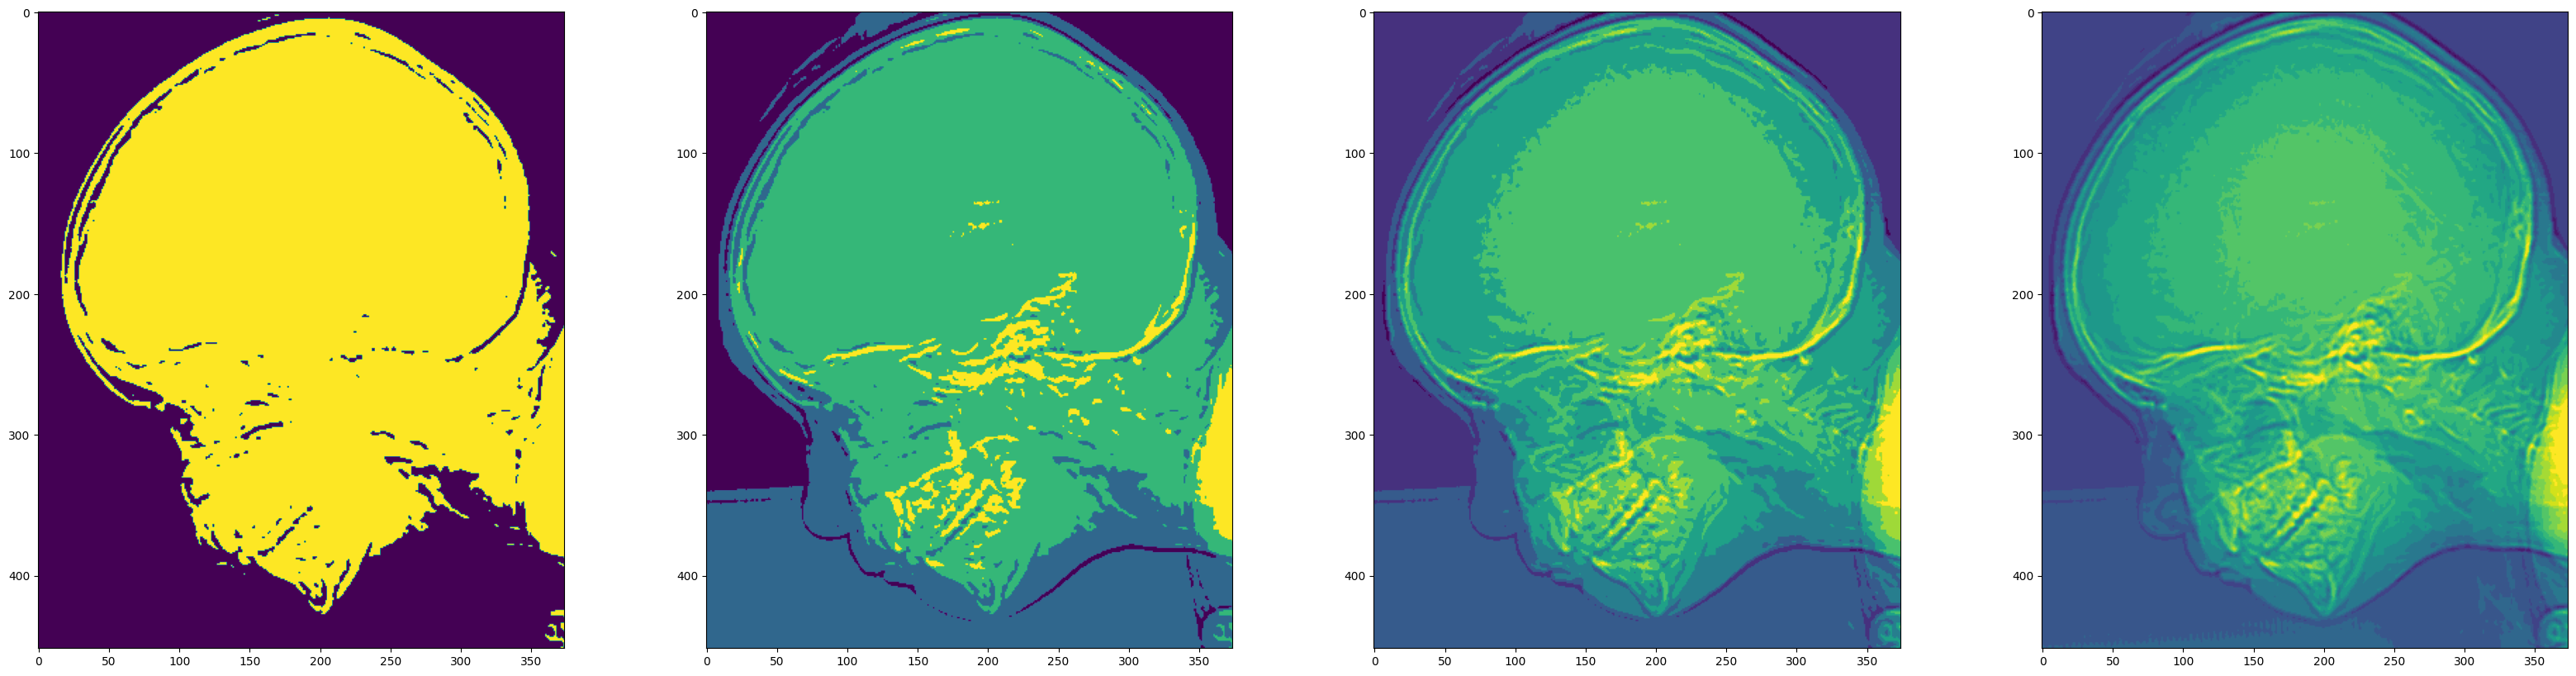

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(("ctskull-256.tif"), cv2.IMREAD_ANYCOLOR)

def convert_pixel(pixel : np.uint8, nbits):
    percentage = pixel/256
    array = (percentage * (2 ** nbits))
    return array.astype(int)
_ , nx = plt.subplots(1, 4, figsize=(40, 10))


print(img)
nx[0].imshow(convert_pixel(img, 1))lo
nx[1].imshow(convert_pixel(img, 2))
nx[2].imshow(convert_pixel(img, 3))
nx[3].imshow(convert_pixel(img, 4))

plt.show()
